In [1]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
end = dt.datetime.now()
start = dt.date(end.year - 4, end.month,end.day)

cryptolist = ['BTC-USD','ETH-USD','XRP-USD','DOGE-USD','ZIL-USD']

In [3]:
df = reader.get_data_yahoo(cryptolist,start,end)['Adj Close']

In [4]:
df

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Date,,,,,
2017-12-17,19140.800781,719.974976,0.728366,0.005984,NaN
2017-12-18,19114.199219,794.645020,0.778407,0.006433,NaN
2017-12-19,17776.699219,826.822998,0.791257,0.005666,NaN
2017-12-20,16624.599609,819.085999,0.775964,0.006661,NaN
2017-12-21,15802.900391,821.062988,1.193060,0.007425,NaN
...,...,...,...,...,...
2021-12-13,46737.480469,3784.226807,0.782894,0.157565,0.058171
2021-12-14,46612.632812,3745.440430,0.796249,0.180157,0.058307
2021-12-15,48896.722656,4018.388672,0.827431,0.181082,0.062097


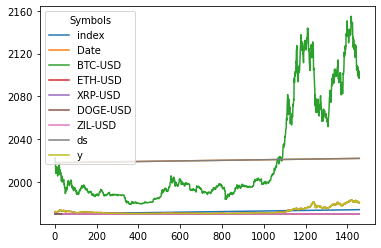

In [85]:
df.plot()
plt.show()

#To compare Cryptos we have to work with returns and not absolute prices

In [86]:
daily_returns = df.pct_change().dropna(axis=0)

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [7]:
daily_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Date,,,,,
2018-01-26,-0.007816,-0.000814,-0.072365,-0.056085,-0.122494
2018-01-27,0.024106,0.049186,0.001512,0.018792,-0.154128
2018-01-28,0.030208,0.125503,0.148051,0.012478,-0.036444
2018-01-29,-0.041565,-0.051083,-0.054037,-0.066711,-0.082470
2018-01-30,-0.105352,-0.094075,-0.140041,-0.135352,-0.154920
...,...,...,...,...,...
2021-12-13,-0.067085,-0.084709,-0.069450,-0.072552,-0.110698
2021-12-14,-0.002671,-0.010249,0.017058,0.143382,0.002338
2021-12-15,0.049002,0.072875,0.039161,0.005134,0.065001


Now we need to cumulate these returns to make cryptos comparable

In [8]:
daily_cum_returns = (daily_returns + 1).cumprod() -1

In [9]:
daily_cum_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Date,,,,,
2018-01-26,-0.007816,-0.000814,-0.072365,-0.056085,-0.122494
2018-01-27,0.016102,0.048332,-0.070963,-0.038346,-0.257742
2018-01-28,0.046796,0.179900,0.066581,-0.026347,-0.284793
2018-01-29,0.003286,0.119627,0.008947,-0.091300,-0.343776
2018-01-30,-0.102412,0.014299,-0.132347,-0.214295,-0.445438
...,...,...,...,...,...
2021-12-13,3.150974,2.583446,-0.403387,19.551063,-0.572395
2021-12-14,3.139886,2.546718,-0.393209,22.497718,-0.571395
2021-12-15,3.342747,2.805184,-0.369447,22.618364,-0.543535


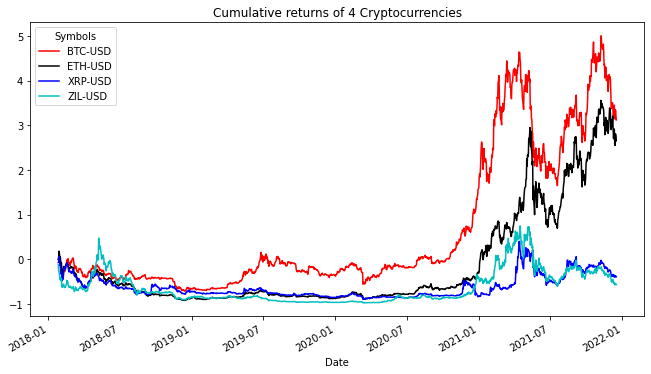

In [61]:
colors = ['r','k','b', 'c']

daily_cum_returns.drop(columns='DOGE-USD').plot(color=colors, figsize=(11,6))
plt.title('Cumulative returns of 4 Cryptocurrencies')
plt.show()

Cryptocurrency price charts over the last 4 years

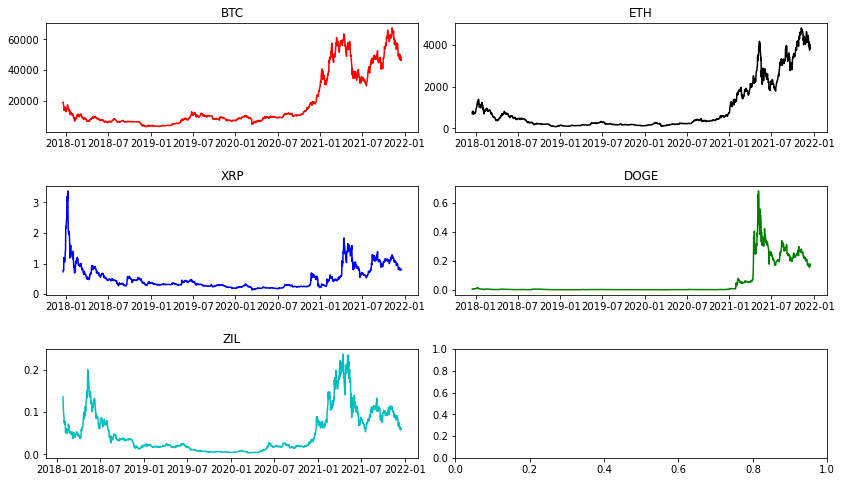

In [11]:
fig, axs = plt.subplots(3, 2,figsize=(14,8), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0, 0].plot(df['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 1].plot(df['ETH-USD'], c='k')
axs[0, 1].set_title('ETH')
axs[1, 0].plot(df['XRP-USD'], c='b')
axs[1, 0].set_title('XRP')
axs[1, 1].plot(df['DOGE-USD'], c='g')
axs[1, 1].set_title('DOGE')
axs[2, 0].plot(df['ZIL-USD'], c='c')
axs[2, 0].set_title('ZIL')
plt.show()

Comparison of daily volitilities

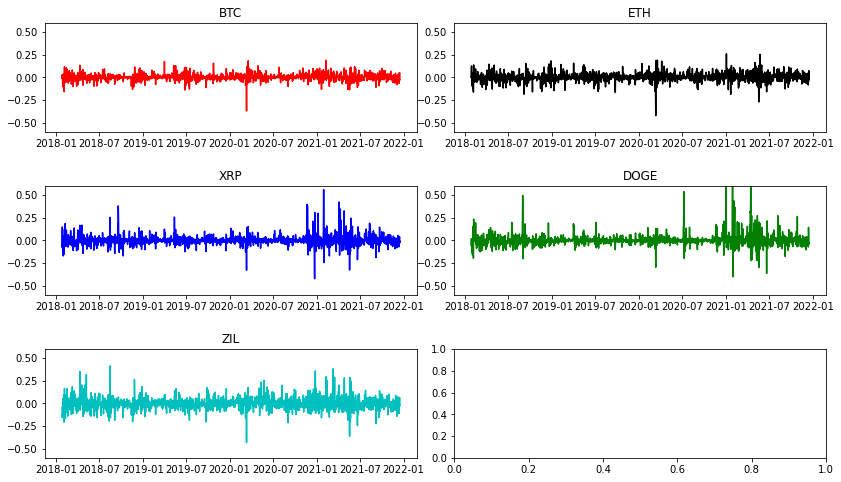

In [12]:
fig, axs = plt.subplots(3, 2,figsize=(14,8), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0, 0].plot(daily_returns['BTC-USD'], c='r')
axs[0, 0].set_title('BTC')
axs[0, 0].set_ylim([-0.6, 0.6])
axs[0, 1].plot(daily_returns['ETH-USD'], c='k')
axs[0, 1].set_title('ETH')
axs[0, 1].set_ylim([-0.6, 0.6])
axs[1, 0].plot(daily_returns['XRP-USD'], c='b')
axs[1, 0].set_title('XRP')
axs[1, 0].set_ylim([-0.6, 0.6])
axs[1, 1].plot(daily_returns['DOGE-USD'], c='g')
axs[1, 1].set_title('DOGE')
axs[1, 1].set_ylim([-0.6, 0.6])
axs[2, 0].plot(daily_returns['ZIL-USD'], c='c')
axs[2, 0].set_title('ZIL')
axs[2, 0].set_ylim([-0.6, 0.6])
plt.show()

How are returns distributed?

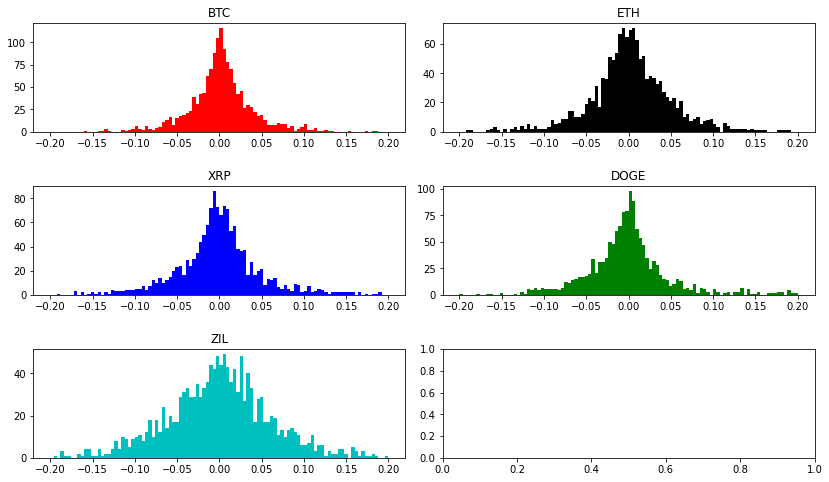

In [13]:
fig, axs = plt.subplots(3, 2,figsize=(14,8), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0, 0].hist(daily_returns['BTC-USD'], bins=100, color='r', range=(-0.2, 0.2))
axs[0, 0].set_title('BTC')
axs[0, 1].hist(daily_returns['ETH-USD'], bins=100, color='k', range=(-0.2, 0.2))
axs[0, 1].set_title('ETH')
axs[1, 0].hist(daily_returns['XRP-USD'], bins=100, color='b', range=(-0.2, 0.2))
axs[1, 0].set_title('XRP')
axs[1, 1].hist(daily_returns['DOGE-USD'], bins=100, color='g', range=(-0.2, 0.2))
axs[1, 1].set_title('DOGE')
axs[2, 0].hist(daily_returns['ZIL-USD'], bins=100, color='c', range=(-0.2, 0.2))
axs[2, 0].set_title('ZIL')

plt.show()

Extreme Returns

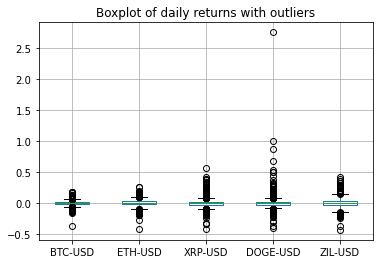

In [14]:
daily_returns.boxplot()
plt.title('Boxplot of daily returns with outliers')
plt.show()

Without outliers

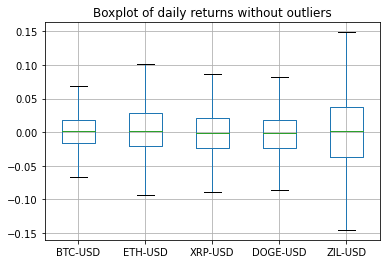

In [15]:
daily_returns.boxplot(showfliers=False)
plt.title('Boxplot of daily returns without outliers')
plt.show()

Correlations of cryptocurrency returns

In [16]:
daily_returns.corr()

Symbols,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,ZIL-USD
Symbols,,,,,
BTC-USD,1.000000,0.813320,0.597376,0.354739,0.613912
ETH-USD,0.813320,1.000000,0.662636,0.331742,0.650045
XRP-USD,0.597376,0.662636,1.000000,0.286522,0.514531
DOGE-USD,0.354739,0.331742,0.286522,1.000000,0.243588
ZIL-USD,0.613912,0.650045,0.514531,0.243588,1.000000


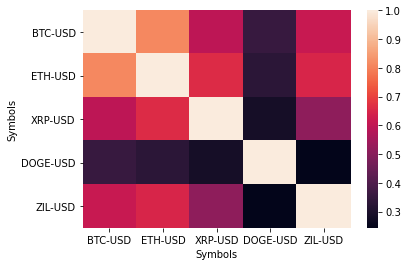

In [17]:
sns.heatmap(daily_returns.corr())
plt.show()

Let's backtest a forecasting module with Cryptos (BTC first)

In [22]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
end1 = dt.date(end.year - 1, end.month, end.day) #1 year back
end2 = dt.date(end.year, end.month - 6, end.day) #6 months back
start1 = dt.date(end1.year - 3, end.month, end.day)

In [25]:
df1 = reader.get_data_yahoo(cryptolist, start1, end1)['Adj Close']
df2 = reader.get_data_yahoo(cryptolist, start1, end2)['Adj Close']

In [26]:
modelfb1 = Prophet()
df1 = df1.reset_index()
df1[['ds', 'y']] = df1[['Date', 'BTC-USD']]
modelfb1.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
modelfb2 = Prophet()
df2 = df2.reset_index()
df2[['ds', 'y']] = df2[['Date', 'BTC-USD']]
modelfb2.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = modelfb1.make_future_dataframe(periods=365)

In [33]:
future1 = modelfb2.make_future_dataframe(periods=180)

In [36]:
forecast1 = modelfb1.predict(future)
forecast2 = modelfb2.predict(future1)

1 year prediction

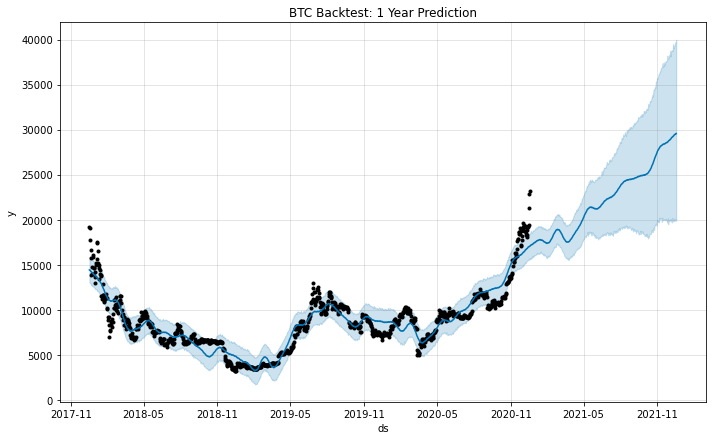

In [62]:
modelfb1.plot(forecast1)
plt.title('BTC Backtest: 1 Year Prediction')
plt.show()

6 month prediction

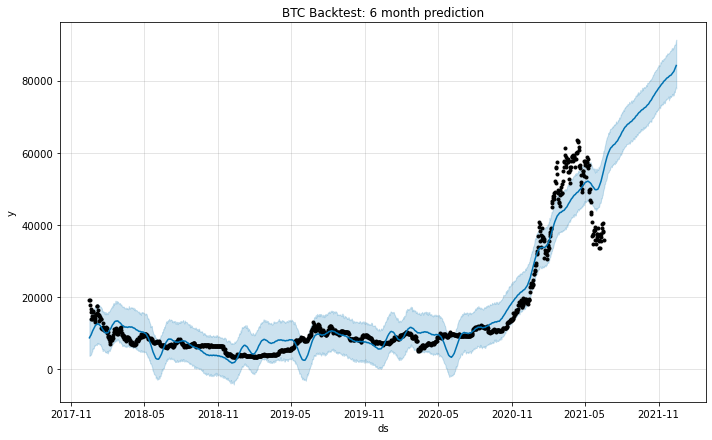

In [63]:
modelfb2.plot(forecast2)
plt.title('BTC Backtest: 6 month prediction')
plt.show()

Where is BTC going 6 months from now?

In [39]:
modelfb3 = Prophet()
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'BTC-USD']]
modelfb3.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future3 = modelfb3.make_future_dataframe(periods=180)

In [41]:
forecast3 = modelfb3.predict(future3)

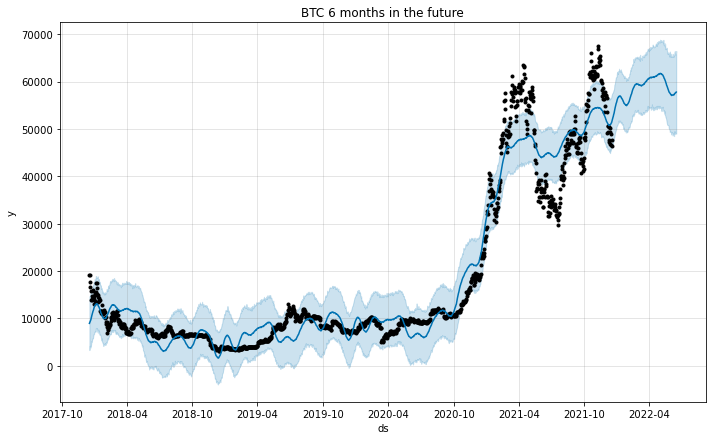

In [42]:
modelfb3.plot(forecast3)
plt.title('BTC 6 months in the future')
plt.show()

How about ETH 6 months in the future?

In [64]:
modelfb4 = Prophet()
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'ETH-USD']]
modelfb4.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
future4 = modelfb4.make_future_dataframe(periods=180)

In [66]:
forecast4 = modelfb4.predict(future4)

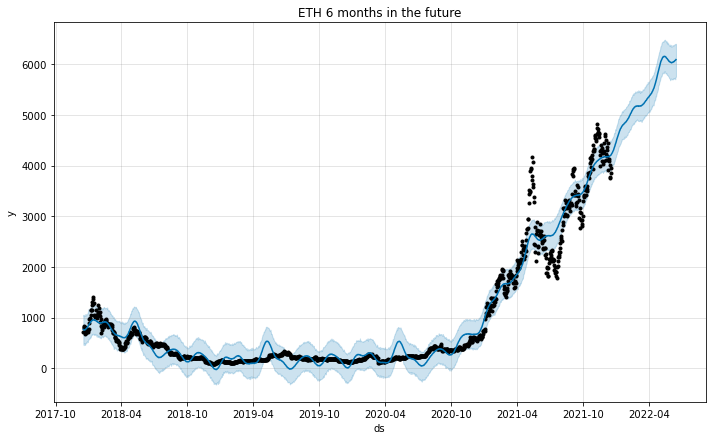

In [67]:
modelfb4.plot(forecast4)
plt.title('ETH 6 months in the future')
plt.show()

ETH 6 month backtest